### Quantum Circuit running on simulators and real quantum computer with working IBMid and API key

In [1]:
#Notebook for learning quantum qiskit basics, running a circuit 3 different ways. Created for Mizzou Quantum Learning Buddies
#Created May 1, 2025
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_circuit_layout, plot_histogram
from qiskit_aer import AerSimulator, Aer
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
import matplotlib.pyplot as plt



### Use pip install _____ to download required libraries. 
### Running the command below should hopefully install all required libraries for this, if not check error codes.
###### pip install qiskit qiskit_aer pylatexenc matplotlib qiskit_ibm_runtime
The line below will work if you uncomment to install packages


In [2]:
#%pip install qiskit qiskit_aer pylatexenc matplotlib qiskit_ibm_runtime

In [1]:
#API key = QiskitRuntimeService will work, 


#service = QiskitRuntimeService(channel="ibm_quantum", token="YOUR_TOKEN_HERE")

In [5]:
#It is OK if I get a warning error here
service = QiskitRuntimeService()

real_backend = service.backend("ibm_sherbrooke") #Can switch to other if sherbrooke taken down
has_real_backend = True

simulator = AerSimulator()
fake_backend = FakeSherbrooke() #Can switch to other if sherbrooke taken down

/var/folders/hp/_h_fftf95ggdmv979tc9yg0c0000gn/T/ipykernel_8568/4288963796.py:2: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService()


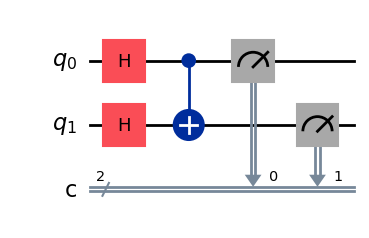

In [6]:

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.draw('mpl')


In [7]:
def run_circuit(circuit, shots=1024):
    results = {}

    #Run on AerSimulator
    tqc_sim = transpile(circuit, simulator)
    job_sim = simulator.run(tqc_sim, shots=shots)
    result_sim = job_sim.result()
    results['simulator'] = result_sim.get_counts(circuit)

    #Run on Fake Backend
    tqc_fake = transpile(circuit, fake_backend)
    job_fake = fake_backend.run(tqc_fake, shots=shots)
    result_fake = job_fake.result()
    results['fake_backend'] = result_fake.get_counts(circuit)

    #Run on Real Backend (if available)
    if has_real_backend and real_backend:
        try:
            tqc_real = transpile(circuit, real_backend)
            sampler = Sampler(mode=real_backend)
            job_real = sampler.run([tqc_real], shots=shots)
            print(f"Submitted job to real backend... Job ID: {job_real.job_id()}")
            result_real = job_real.result()[0].data
            counts_real = result_real.__dict__["c"].get_counts()
            results['real_backend'] = counts_real
        except Exception as e:
            print(f"Error running on real backend: {e}")
            results['real_backend'] = "Failed"
    return results


/opt/anaconda3/lib/python3.12/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:1129: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


Submitted job to real backend... Job ID: d14x0dhqf56g0081wcp0

Results from simulator:


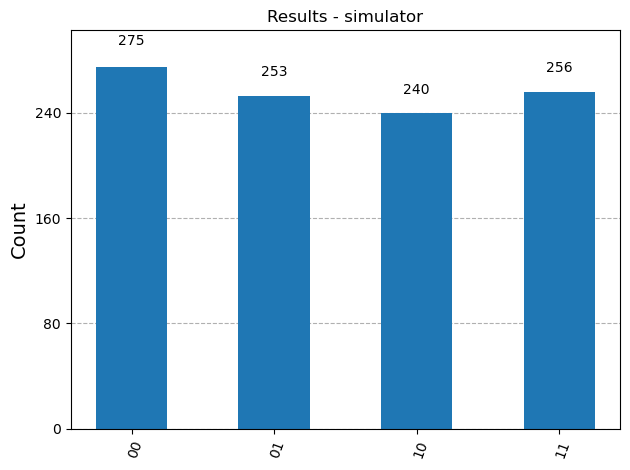


Results from fake_backend:


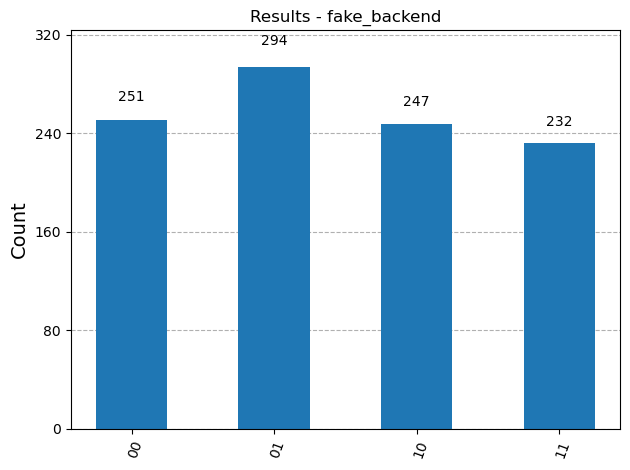


Results from real_backend:


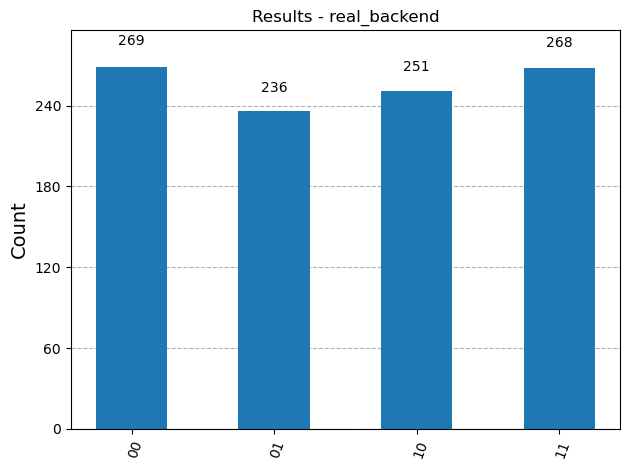

In [8]:
#Run the circuit on all backends
results = run_circuit(circuit)

#Display histograms
for backend, counts in results.items():
    print(f"\nResults from {backend}:")
    display(plot_histogram(counts, title=f"Results - {backend}"))
